In [2]:
from top2vec import Top2Vec

model_file = "/home/cds/Documents/Models/top2vec.model"

model = Top2Vec.load(model_file)

In [ ]:
import numpy as np
import logging
import umap
logger = logging.getLogger('top2vec')
logger.setLevel(logging.WARNING)
sh = logging.StreamHandler()
sh.setFormatter(logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s'))
logger.addHandler(sh)

logger.info('Creating lower dimension embedding of documents')
umap_model = umap.UMAP(n_neighbors=15,
                       n_components=2,
                       metric='cosine').fit(model._get_document_vectors())

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

original = model._get_document_vectors()

pca = PCA(n_components=3)
pca.fit(original)

PCA(n_components=3)

In [8]:
reduced = pca.transform(original)


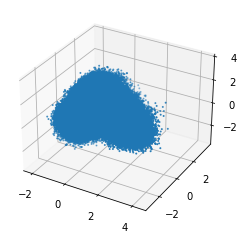

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced[:,0], reduced[:,1], reduced[:,2], s=1)

plt.show()

In [12]:
fig.savefig('doc.png', dpi=600)

In [18]:
pca2 = PCA(n_components=2)
pca2.fit(original)

reduced2 = pca2.transform(original)

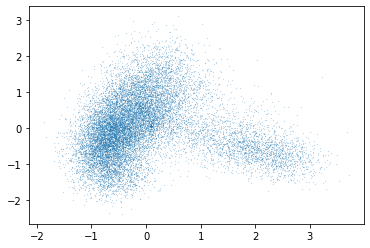

In [31]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.scatter(reduced2[::100,0], reduced2[::100,1], s=0.01)

In [32]:
fig2.savefig('doc2.pdf', dpi=300)

In [36]:
a,b,c,d = model.search_topics(keywords=["seasonal", "affective", "disorder", "syndrome"], num_topics=10)
print (c)

[0.7254 0.6625 0.6608 0.6124 0.5823 0.5661 0.5438 0.5193 0.5004 0.4913]


In [40]:
a = ["disorder", "apple"]
b= model._get_word_vectors(a)
model.model.docvecs.most_similar(positive=b, topn=1)

[(72281, 0.5076264142990112)]